In [225]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

from pycoingecko import CoinGeckoAPI
from prophet import Prophet

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Monospace"


In [253]:
class CoinPredict():
    '''
    identifier: coin id from coingecko API
    start_timestamp, end_timestamp: period for historical data by timestamp
    period: period of prediction by Prophet
    
    EXAMPLE:
    >>> identifier = "bitcoin"
    >>> start_timestamp = datetime(2018,5,1)
    >>> start_timestamp = datetime.timestamp(start_timestamp)
    >>> end_timestamp = datetime.timestamp(datetime.utcnow())
    >>> period = 365 #days
    >>> cp = CoinPredict(identifier=identifier,start_timestamp=start_timestamp,
                                end_timestamp=end_timestamp, period=period)
    # By default mcap=True.
    # if False return prices prediction, if True return market cap. prediction
    >>> cp.prophet(mcap=True)
    '''
    
    def __init__(self, identifier, start_timestamp, end_timestamp, period):
        self.cg = CoinGeckoAPI()
        self.identifier = identifier
        self.start_timestamp = start_timestamp
        self.end_timestamp = end_timestamp
        self.data = self.get_data()
        self.period = period
        self.fig = plt.figure(figsize=(20,10))
    
    def get_data(self):
        raw = self.cg.get_coin_market_chart_range_by_id(
            self.identifier, vs_currency='usd', from_timestamp=self.start_timestamp, to_timestamp=self.end_timestamp
        )
        mcap = np.array(raw['market_caps'])[:,1].astype('float')
        prices = np.array(raw['prices'])[:,1].astype('float')
        volumes = np.array(raw['total_volumes'])[:,1].astype('float')
        time = np.array(raw['prices'])[:,0]/1000
        time = [datetime.fromtimestamp(int(time[i])) for i in range(len(time))]
        #time = pd.DatetimeIndex(time)
        data = pd.DataFrame({
            "Times":time,"Price":prices,"Market cap":mcap,"Volume":volumes
        })
        return data
    
    def prophet(self, mcap=False):
        if mcap:

            t = self.data["Times"]
            y = self.data['Market cap']
            df = pd.DataFrame({"ds":t,"y":y})
            m = Prophet()
            m.fit(df)
            future = m.make_future_dataframe(periods=self.period)
            forecast = m.predict(future)
            ax=plt.subplot()
            ax.set_title("M. cap. "+self.identifier, fontsize=20)
            labels=ax.set_xticks(np.arange(len(t)))
            ax.set_xticklabels(labels,rotation=50)
            ax.set_xlabel('time', fontsize=18)
            ax.set_ylabel('value', fontsize=18)
            self.fig.add_subplot(ax)
            fig1 = m.plot(forecast,ax=ax, figsize=(20, 20))
            
        else:
            t = self.data["Times"]
            y = self.data['Price']
            df = pd.DataFrame({"ds":t,"y":y})
            m = Prophet()
            m.fit(df)
            future = m.make_future_dataframe(periods=self.period)
            forecast = m.predict(future)
            ax=plt.subplot()
            ax.set_title("Price "+self.identifier, fontsize=20)
            labels=ax.set_xticks(np.arange(len(t)))
            ax.set_xticklabels(labels,rotation=50)
            ax.set_xlabel('time', fontsize=18)
            ax.set_ylabel('value', fontsize=18)
            self.fig.add_subplot(ax)
            fig1 = m.plot(forecast,ax=ax, figsize=(20, 20))

Initial log joint probability = -26.3047
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2329.91      0.024927       409.744      0.4127      0.9433      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2353.79     0.0026528       179.377      0.2144           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       2361.72   0.000234747       158.039    8.07e-07       0.001      353  LS failed, Hessian reset 
     299       2368.07    0.00173849       94.5548           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       2368.41   9.93361e-05       73.0295   7.936e-07       0.001      472  LS failed, Hessian reset 
     339       2374.17    0.00029396        210.08   8.725e-07       0.001      549  LS failed, Hessian rese

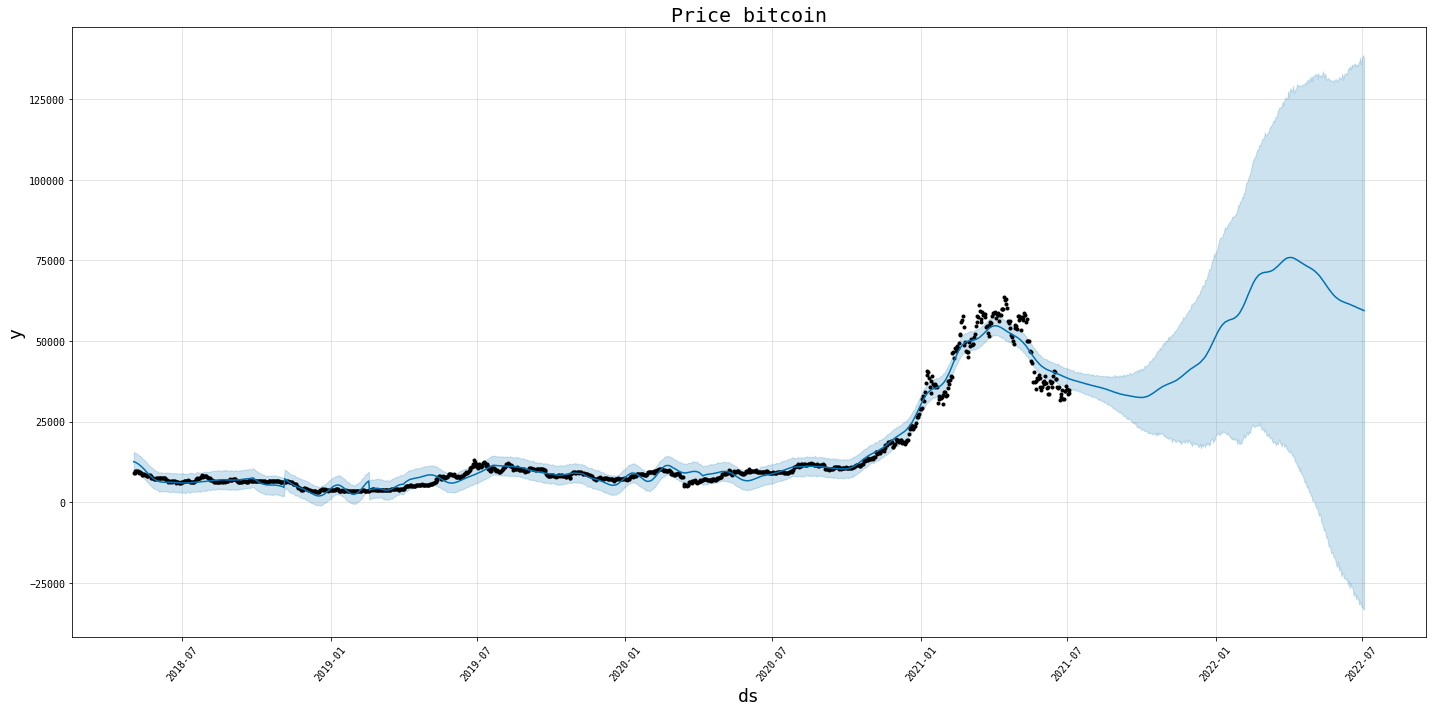

In [254]:
start_timestamp = datetime(2018,5,1)
start_timestamp = datetime.timestamp(start_timestamp)
end_timestamp = datetime.timestamp(datetime.utcnow())
CoinPredict(identifier="bitcoin",start_timestamp=start_timestamp,end_timestamp=end_timestamp, period=365).prophet()